In [136]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from read_db.CH import Getch
import pandas as pd
import scipy.stats as stats

In [137]:
query_1 = """
SELECT user_id, exp_group,
  countIf(post_id, action='like') AS likes,
  countIf(post_id, action='view') AS views,
  round(likes / views, 4) AS ctr
FROM simulator.feed_actions
WHERE (toDate(time) BETWEEN '2021-11-29' AND '2021-12-05') AND exp_group in (0, 1)
GROUP BY user_id, exp_group
"""
df = Getch(query_1).df

In [140]:
df

,user_id,exp_group,likes,views,ctr
0,109963,1,4,13,0.3077
1,138232,1,41,166,0.2470
2,49204,1,39,134,0.2910
3,49286,1,6,61,0.0984
4,145957,1,46,202,0.2277
...,...,...,...,...,...
25019,23359,1,20,91,0.2198
25020,3681,0,6,26,0.2308
25021,110956,1,6,36,0.1667
25022,132567,1,3,14,0.2143


Проверим, что CTR у группы 1 выше, чем у группы 0.

In [141]:
df_0 = df[df.exp_group == 0]
df_1 = df[df.exp_group == 1]

In [142]:
df_0.ctr.mean(), df_1.ctr.mean()

(0.21823558479063052, 0.2338133381111642)

In [143]:
glob_ctr_0 = df_0.likes.sum() / df_0.views.sum()
glob_ctr_1 = df_1.likes.sum() / df_1.views.sum()
glob_ctr_0, glob_ctr_1

(0.21147823480932046, 0.22743163713356582)

In [144]:
stats.mannwhitneyu(df_0.ctr, df_1.ctr)

MannwhitneyuResult(statistic=68878148.5, pvalue=9.161605313320773e-61)

In [ ]:
P-value сильно меньше 0.05, значит различие значимо.

Проверим, не ухудшились ли другие показатели, в частности просмотры постов.

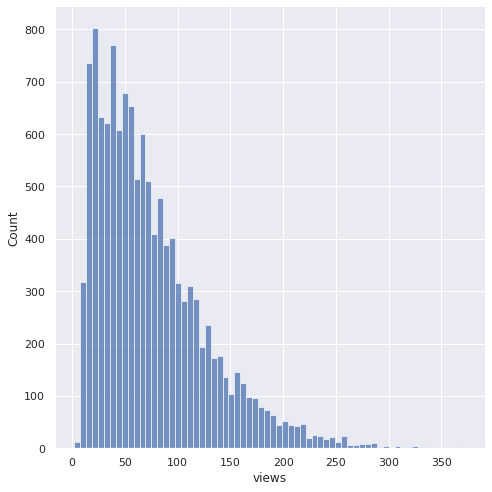

In [152]:
sns.displot(df_0.views, height=7)

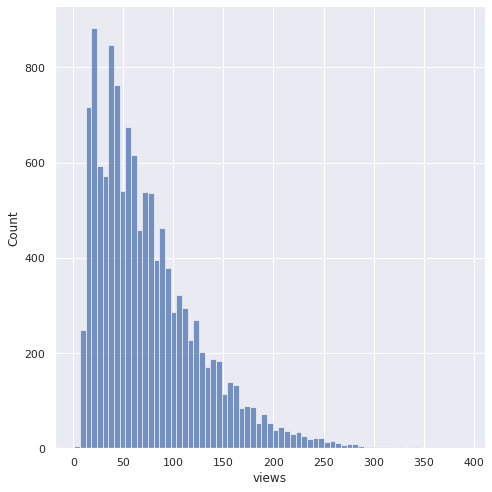

In [153]:
sns.displot(df_1.views, height=7)

In [154]:
stats.ttest_ind(df_0.views, df_1.views)

Ttest_indResult(statistic=0.8406840013351474, pvalue=0.40053301881455616)

In [155]:
stats.mannwhitneyu(df_0.views, df_1.views)

MannwhitneyuResult(statistic=78750995.5, pvalue=0.4038172766227185)